In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#### 1.
Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 2.
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.loc[:, df.dtypes == 'object'].describe()

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


#### 3.
Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
corr_m = df.corr()
corr_m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


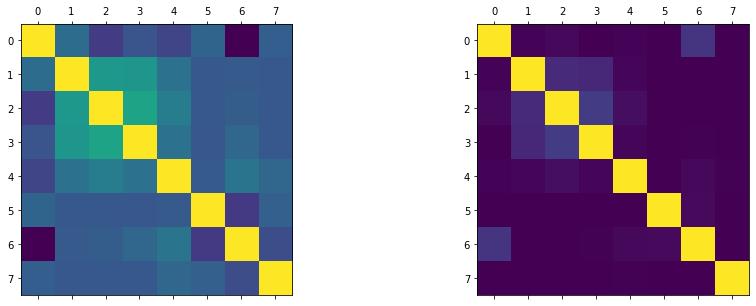

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.matshow(corr_m)
ax2.matshow(corr_m**2)
plt.show()

In [7]:
corr_values = sorted(corr_m.values.ravel(), key=np.abs)
corr_values
for i in [0, 2, -len(corr_m)-1, -len(corr_m) -3]:
    print(corr_m.where(corr_m == corr_values[i]))

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level                    NaN              NaN             NaN   
last_evaluation                       NaN              NaN             NaN   
number_project                        NaN              NaN             NaN   
average_montly_hours                  NaN              NaN             NaN   
time_spend_company                    NaN              NaN             NaN   
Work_accident                         NaN              NaN             NaN   
left                                  NaN              NaN             NaN   
promotion_last_5years                 NaN              NaN             NaN   

                       average_montly_hours  time_spend_company  \
satisfaction_level                      NaN                 NaN   
last_evaluation                         NaN                 NaN   
number_project                          NaN                 NaN   
average_montly_hours         

Наиболее скоррелированные:
corr(average_montly_hours, number_project) = 0.41;
corr(left, satisfaction_level) = -0.39.

Наименее скоррелированные:
corr(time_spend_company, Work_accident) = 0.002120;
corr(average_montly_hours, promotion_last_5years) = -0.003544.

#### 4.
Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [8]:
df.agg('department').value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

#### 5.
Показать распределение сотрудников по зарплатам.

In [10]:
df.agg('salary').value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

#### 6.
Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [73]:
df.groupby(['department', 'salary'], ). agg(['count'])['left']

count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

#### 7.
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [45]:
low_paid_hours = df.loc[df['salary'] == 'low', 'average_montly_hours']
high_paid_hours = df.loc[df['salary'] == 'high', 'average_montly_hours']
print(low_paid_hours.mean(), high_paid_hours.mean())

print(st.bayes_mvs(low_paid_hours, 0.95), '\n')
print(st.bayes_mvs(high_paid_hours, 0.95))
# Variances are significantly different
st.mannwhitneyu(low_paid_hours, high_paid_hours)

200.9965828321487 199.86742118027485
(Mean(statistic=200.9965828321487, minmax=(199.83186536925467, 202.16130029504274)), Variance(statistic=2583.560813910716, minmax=(2499.8377854870505, 2667.283842334382)), Std_dev(statistic=50.82874003859151, minmax=(50.00516042241276, 51.65231965477027))) 

(Mean(statistic=199.86742118027485, minmax=(197.20975090433825, 202.52509145621144)), Variance(statistic=2274.446448725598, minmax=(2095.1985988201172, 2453.694298631079)), Std_dev(statistic=47.69115692374844, minmax=(45.81190024947575, 49.570413598021126)))


MannwhitneyuResult(statistic=4507096.5, pvalue=0.4120665360429347)

Гипотеза не подтвердилась.

#### 8.
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

    ● Доля сотрудников с повышением за последние 5 лет;
    ● Средняя степень удовлетворенности;
    ● Среднее количество проектов.

In [101]:
gdf = df.groupby(['left', 'promotion_last_5years']) # (lambda x: x['promotion_last_5years'].value_counts())
promoted_left = gdf.get_group((0, 1)).size
promoted_not_left = gdf.get_group((1, 1)).size

all_left = (df['left'] == 0).sum()
all_not_left = (df['left'] == 1).sum()
print(f'ratio of promoted in left group: {promoted_left/all_left:.2f}')
print(f'ratio of promoted in not left group: {promoted_not_left/all_not_left:.2f}')

ratio of promoted in left group: 0.26
ratio of promoted in not left group: 0.05


In [102]:
df.groupby(['left']).agg('mean')['satisfaction_level']

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [103]:
df.groupby(['left']).agg('mean')['number_project']

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

#### 9.
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [112]:
# df no objects
df_no = df.drop(labels = (df.loc[:, df.dtypes == 'object'].columns), axis=1) 

In [113]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_no, test_size=0.2, random_state=18)

y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
lda.predict(data_test)
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
from sklearn.metrics import accuracy_score
print('Accuracy = ', accuracy_score(result[0], result[1]))
lda.coef_

Accuracy =  0.769


array([[-4.46201557,  0.7032631 , -0.24166233,  0.00446404,  0.22807091,
        -1.04174718, -1.06242342]])